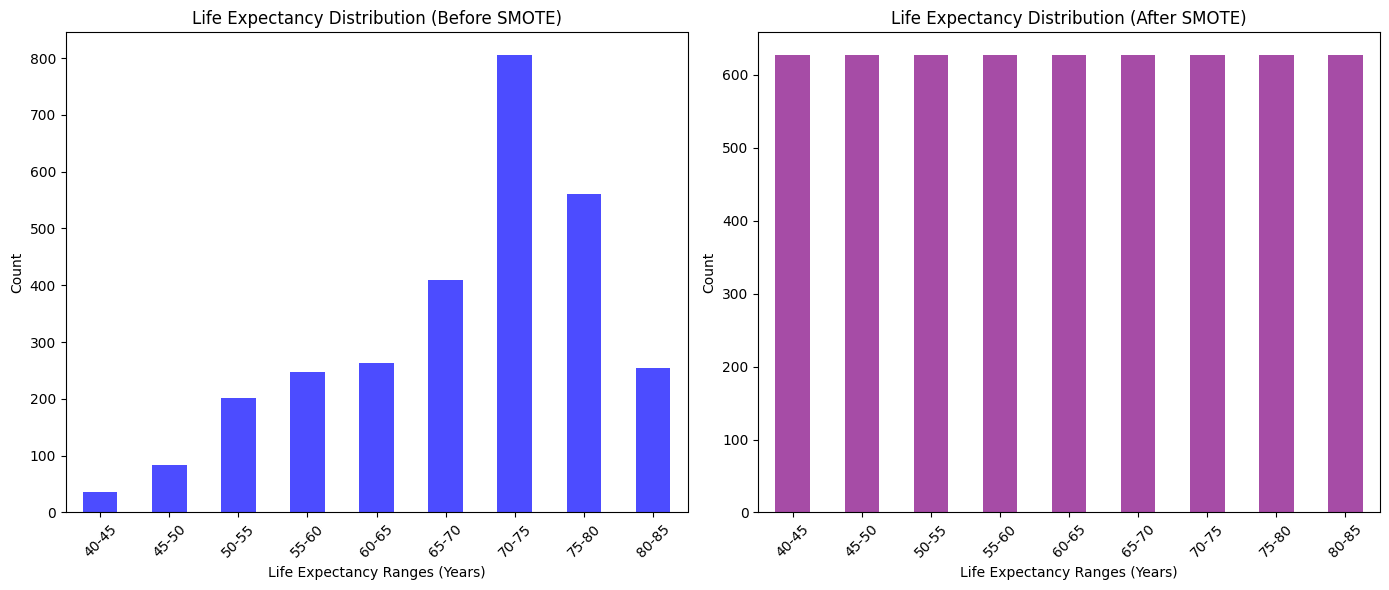

Original training dataset size: (2290, 17)
Resampled training dataset size: (5643, 17)


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

df = pd.read_csv('../data/data.csv')

# Drop irrelevant columns
df = df.drop(columns=['Country', 'Year', 'Region'])

# Bin 'Life_expectancy' values into intervals of 5 years from 40 to 85
bins = np.arange(40, 90, 5)
bin_labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins) - 1)]
df['Life_expectancy_bin'] = pd.cut(df['Life_expectancy'], bins=bins, labels=bin_labels, right=False)

# Encode categorical variables using LabelEncoder
label_encoders = {}
encoded_df = df.copy()
for col in encoded_df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col])
    label_encoders[col] = le

# Define the features and target variable
X = encoded_df.drop(columns=['Life_expectancy', 'Life_expectancy_bin'])
y = encoded_df['Life_expectancy_bin']

# Drop rows with missing target labels (SMOTE cannot handle missing values)
X = X[y.notnull()]
y = y[y.notnull()]

# Ensure the target variable is categorical as SMOTE requires this
y = y.astype('category').cat.codes

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Apply SMOTE to the training data only 
smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Map the numeric target variable back to bin labels
y_resampled_mapped = pd.Series(y_resampled).map(dict(enumerate(bin_labels)))

# Sort the bins in ascending order
sorted_bins = sorted(bin_labels, key=lambda x: int(x.split('-')[0]))

# Visualize the distribution of the target variable
plt.figure(figsize=(14, 6))

# Before SMOTE
plt.subplot(1, 2, 1)
df['Life_expectancy_bin'].value_counts(sort=False).reindex(sorted_bins).plot(kind='bar', color='blue', alpha=0.7)
plt.title('Life Expectancy Distribution (Before SMOTE)')
plt.xlabel('Life Expectancy Ranges (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)

# After SMOTE
plt.subplot(1, 2, 2)
y_resampled_mapped.value_counts(sort=False).reindex(sorted_bins).plot(kind='bar', color='purple', alpha=0.7)
plt.title('Life Expectancy Distribution (After SMOTE)')
plt.xlabel('Life Expectancy Ranges (Years)')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Output the shapes of the original and resampled datasets
print(f"Original training dataset size: {X_train.shape}")
print(f"Resampled training dataset size: {X_resampled.shape}")
